<a href="https://colab.research.google.com/github/code-joker07/Data-Analysis-On-Hotel-Booking/blob/main/Hotel_Booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import plotly.express as px

# Loading the dataset

In [2]:
# visualisation of dataset
df = pd.read_csv('/content/hotel_bookings.csv')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [3]:
data_2015 = df[df['arrival_date_year']==2015]
data_2015['is_canceled'].value_counts(normalize = True)

0    0.629842
1    0.370158
Name: is_canceled, dtype: float64

In [4]:
# shape of the dataset
df.shape

(119390, 32)

In [5]:
# Identify
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


Name of all the attributes

In [7]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

Observe the unique dataset of categorical attribute and date_time

In [8]:
for col in df.describe(include = 'object').columns:
  print(col)
  print(df[col].unique())
  print('='*50)

hotel
['Resort Hotel' 'City Hotel']
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IR

# Handling Missing Data

In [9]:
# Finding total number of missing data from each attributes
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [10]:
# % of Missing Data in each attribute
df.isnull().mean()*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [11]:
# Extract those columns that contain missing data
cols = [var for var in df.columns if df[var].isnull().mean()<1 and df[var].isnull().mean()>0]
cols

['children', 'country', 'agent', 'company']

In [12]:
# Creating an array of missing data
missing = [["children",df['children'].isnull().sum()/len(df['children'])*100],
           ["country",df['country'].isnull().sum()/len(df['country'])*100],
           ["agent",df['agent'].isnull().sum()/len(df['agent'])*100],
           ["company",df['company'].isnull().sum()/len(df['company'])*100]]

In [13]:
missing

[['children', 0.003350364352123293],
 ['country', 0.40874445095904177],
 ['agent', 13.686238378423655],
 ['company', 94.30689337465449]]

In [14]:
# create a data frame
missing_observation = pd.DataFrame(missing,columns=['columns','missing_percentage'])
missing_observation

,columns,missing_percentage
0,children,0.003350
1,country,0.408744
2,agent,13.686238
3,company,94.306893


In [15]:
# plot the bar for missing data
px.bar(data_frame = missing_observation, x = 'columns', y = 'missing_percentage',
        template = 'plotly_dark')

In [16]:
# From this plot we can say that "agent" & "company" attribute has 13.68% and 94.30% of missing data respectively.So for this two attribute, we insert missing data by using Multivariate Imputation By Chained Equations algorithm(MICE). On the other hand "children" & "country", this two attribute has <1% of missing data. So to impute missing data in "children" we use median imputation technique and for the attribute "company" we use mode imputation technique.

In [17]:
df['country'].value_counts()/len(df['country'])*100

PRT    40.698551
GBR    10.159142
FRA     8.723511
ESP     7.176480
DEU     6.103526
         ...    
DJI     0.000838
BWA     0.000838
HND     0.000838
VGB     0.000838
NAM     0.000838
Name: country, Length: 177, dtype: float64

In [18]:
df['country'].value_counts().head(20)

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
USA     2097
CHE     1730
CN      1279
AUT     1263
SWE     1024
CHN      999
POL      919
ISR      669
RUS      632
NOR      607
Name: country, dtype: int64

In [19]:
new_data_old = pd.DataFrame(df['country'],columns=['country'])

In [20]:
counts = new_data_old['country'].value_counts()
threshold = 1000
repl = counts[counts < threshold].index
new_data_old['country'] = new_data_old['country'].replace(repl, 'OTHER')

<Axes: >

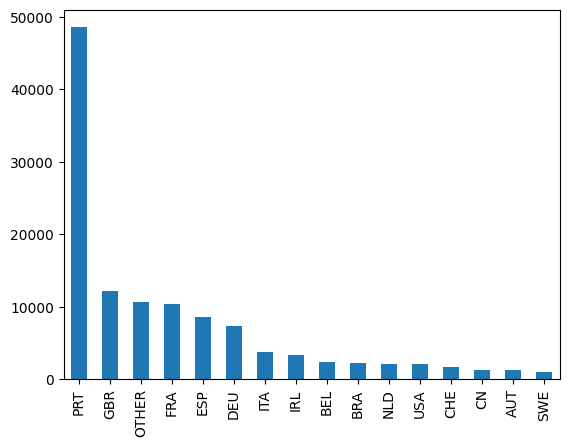

In [21]:
new_data_old['country'].value_counts().plot(kind='bar')

In [22]:
imputer = SimpleImputer(strategy ='most_frequent')

In [23]:
new_data_country=imputer.fit_transform(new_data_old)

In [24]:
new_data_country = pd.DataFrame(new_data_country,columns=['country'])

In [25]:
new_data_country.isnull().sum()

country    0
dtype: int64

In [26]:
df = df.drop(columns=['country'])
df['country'] = new_data_country['country']

In [27]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_

<Axes: >

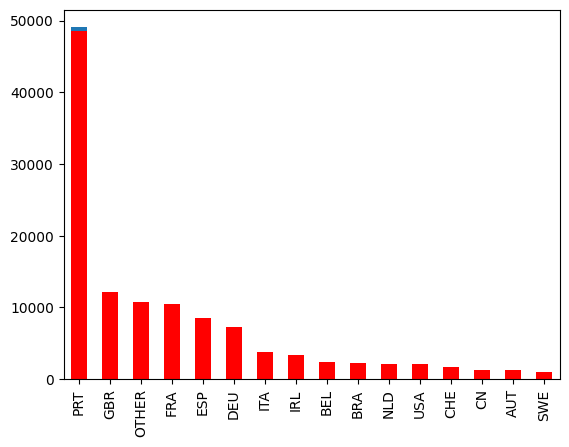

In [28]:
df['country'].value_counts().plot(kind='bar')
new_data_old['country'].value_counts().plot(kind='bar',color='red')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [30]:
new_data_child = pd.DataFrame(df['children'],columns=['children'])
imputer_2 = SimpleImputer(strategy ='median')
new_children = imputer_2.fit_transform(new_data_child)
df = df.drop(columns=['children'])
df['children'] = new_children

<Axes: xlabel='children', ylabel='Density'>

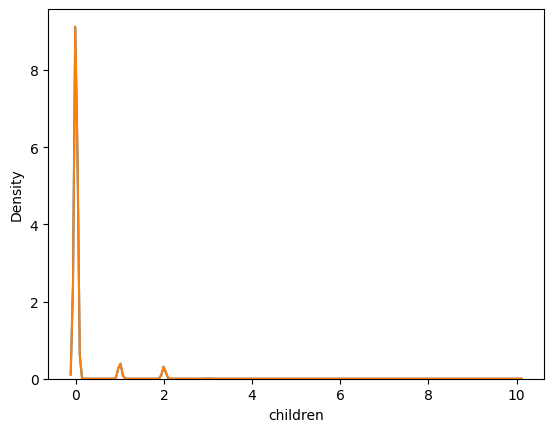

In [31]:
sns.kdeplot(new_data_child['children'])
sns.kdeplot(df['children'])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  babies                          119390 non-null  int64  
 11  meal                            119390 non-null  object 
 12  market_segment  

In [33]:
# Creating two DataFrame df_int(Contaning integer only) & df_obj(Containing object only)
df_int = df.select_dtypes(exclude=['object'])
df_obj = df.select_dtypes(include=['object'])

from this we can say that all the features are not correlated with each other

In [34]:
dt = DecisionTreeRegressor()
imp = IterativeImputer(estimator=dt)

In [35]:
df_new_imp = imp.fit_transform(df_int)
df_new = pd.DataFrame(df_new_imp,columns=df_int.columns)

In [36]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119390 non-null  float64
 1   lead_time                       119390 non-null  float64
 2   arrival_date_year               119390 non-null  float64
 3   arrival_date_week_number        119390 non-null  float64
 4   arrival_date_day_of_month       119390 non-null  float64
 5   stays_in_weekend_nights         119390 non-null  float64
 6   stays_in_week_nights            119390 non-null  float64
 7   adults                          119390 non-null  float64
 8   babies                          119390 non-null  float64
 9   is_repeated_guest               119390 non-null  float64
 10  previous_cancellations          119390 non-null  float64
 11  previous_bookings_not_canceled  119390 non-null  float64
 12  booking_changes 

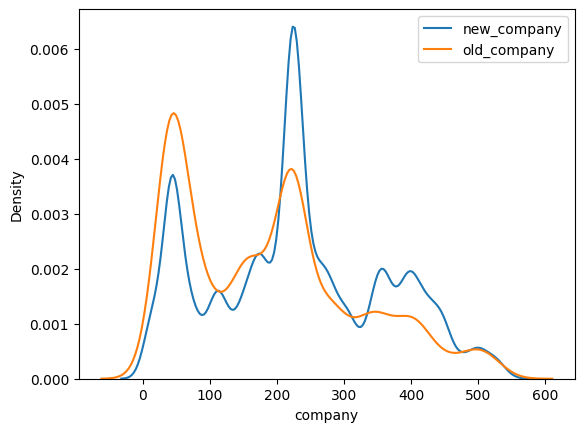

In [37]:
sns.kdeplot(df_new['company'])
sns.kdeplot(df['company'])
labels= ['new_company','old_company']
plt.legend(labels)
plt.show()

In [38]:
# From this kdeplot we can say that the imputed values are not completely aline to the old one

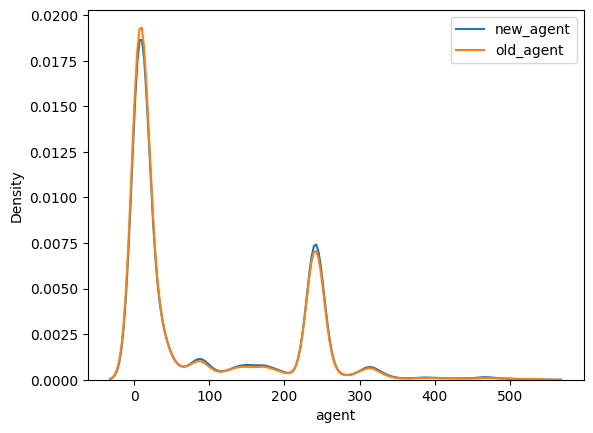

In [39]:
sns.kdeplot(df_new['agent'])
sns.kdeplot(df['agent'])
labels= ['new_agent','old_agent']
plt.legend(labels)
plt.show()

In [40]:
#Here we can say that the imputed values are aline to the old values very well

In [41]:
df_new.isnull().sum()

is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
agent                             0
company                           0
days_in_waiting_list              0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
children                          0
dtype: int64

In [42]:
#We able to successfully impute the missing values

In [43]:
#As there is no key present in df_new & df_obj
for col in df_obj.columns:
  df_new[col] = df_obj[col]

In [44]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119390 non-null  float64
 1   lead_time                       119390 non-null  float64
 2   arrival_date_year               119390 non-null  float64
 3   arrival_date_week_number        119390 non-null  float64
 4   arrival_date_day_of_month       119390 non-null  float64
 5   stays_in_weekend_nights         119390 non-null  float64
 6   stays_in_week_nights            119390 non-null  float64
 7   adults                          119390 non-null  float64
 8   babies                          119390 non-null  float64
 9   is_repeated_guest               119390 non-null  float64
 10  previous_cancellations          119390 non-null  float64
 11  previous_bookings_not_canceled  119390 non-null  float64
 12  booking_changes 

# Exploratory Data Analysis(EDA)

In [45]:
# Convert the DateTime object Dataset into datetime64 format
df_new['reservation_status_date'] = pd.to_datetime(df_new['reservation_status_date'])

In [46]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   is_canceled                     119390 non-null  float64       
 1   lead_time                       119390 non-null  float64       
 2   arrival_date_year               119390 non-null  float64       
 3   arrival_date_week_number        119390 non-null  float64       
 4   arrival_date_day_of_month       119390 non-null  float64       
 5   stays_in_weekend_nights         119390 non-null  float64       
 6   stays_in_week_nights            119390 non-null  float64       
 7   adults                          119390 non-null  float64       
 8   babies                          119390 non-null  float64       
 9   is_repeated_guest               119390 non-null  float64       
 10  previous_cancellations          119390 non-null  float64

In [47]:
data = df_new[df_new['is_canceled'] == 0]
px.box(data_frame = data, x = 'reserved_room_type' , y = 'adr' , color = 'hotel' , template = 'plotly_dark' )

In [48]:
# Hotel booking cancelation

In [49]:
cancelled_perc = df_new['is_canceled'].value_counts(normalize = True)
print(cancelled_perc)

px.bar(df_new['is_canceled'].value_counts(),)

0.0    0.629584
1.0    0.370416
Name: is_canceled, dtype: float64


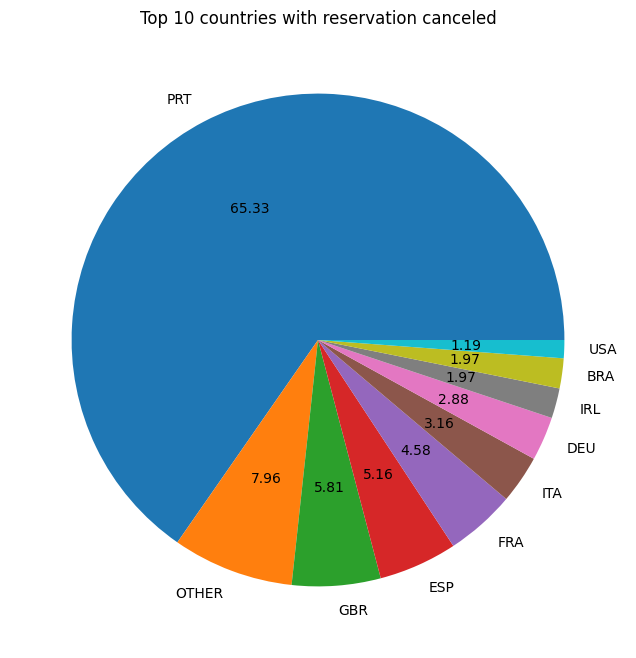

In [50]:
cancelled_data = df_new[df_new['is_canceled']==1]
top_10_country = cancelled_data['country'].value_counts()[:10]
plt.figure(figsize = (8,8))
plt.title('Top 10 countries with reservation canceled')
plt.pie(top_10_country, autopct = '%.2f', labels = top_10_country.index)
plt.show()

In [51]:
# From this bar plot we can say that 37% of the hotle booking was canceled

In [52]:
data_2015 = df_new[df_new['arrival_date_year']=='2015']
data_2015['is_canceled'].value_counts(normalize = True)

Series([], Name: is_canceled, dtype: float64)

<Axes: xlabel='is_canceled', ylabel='count'>

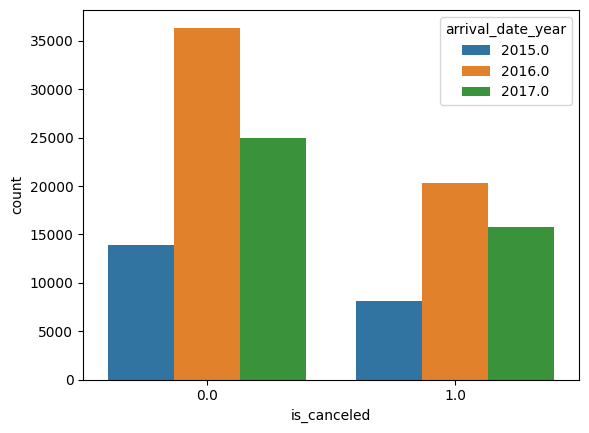

In [53]:
sns.countplot(data = df_new, x = df_new['is_canceled'], hue = df_new['arrival_date_year'] )

2016.0    35.863297
2017.0    38.697864
2015.0    37.015821
Name: arrival_date_year, dtype: float64


<Axes: >

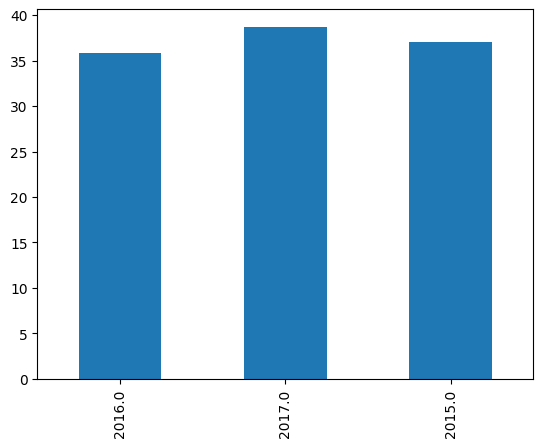

In [54]:
Year_count = df_new[df_new['is_canceled']==1]['arrival_date_year'].value_counts()/(df_new['arrival_date_year'].value_counts())*100
print(Year_count)
Year_count.plot(kind='bar')

<Axes: xlabel='is_canceled', ylabel='count'>

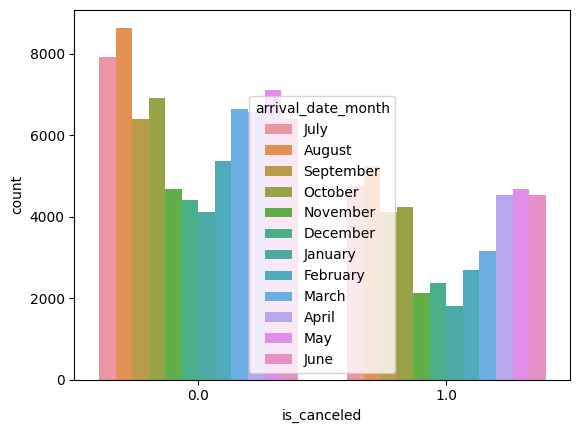

In [55]:
sns.countplot(data = df_new, x = df_new['is_canceled'], hue = df_new['arrival_date_month'] )

<Axes: xlabel='is_repeated_guest', ylabel='count'>

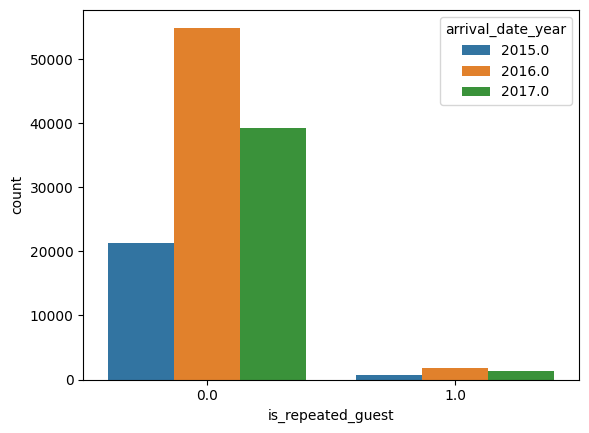

In [56]:
sns.countplot(data = df_new, x = df_new['is_repeated_guest'], hue = df_new['arrival_date_year'] )

# How does the price vary per night over the year

In [57]:
data_resort = df_new[(df_new['hotel'] == 'Resort Hotel') & (df_new['is_canceled']==0)]
date_city = df_new[(df_new['hotel'] == 'City Hotel') & (df_new['is_canceled'] == 0)]

In [58]:
data_resort_c = df_new[(df_new['hotel'] == 'Resort Hotel') & (df_new['is_canceled']==1)]
date_city_c = df_new[(df_new['hotel'] == 'City Hotel') & (df_new['is_canceled'] == 1)]

In [59]:
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel

,arrival_date_month,adr
0,April,75.867816
1,August,181.205892
2,December,68.322236
3,February,54.147478
4,January,48.708919
5,July,150.122528
6,June,107.921869
7,March,57.012487
8,May,76.657558
9,November,48.681640


In [60]:
resort_hotel_c = data_resort_c.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel_c

,arrival_date_month,adr
0,April,82.621246
1,August,197.901943
2,December,71.100301
3,February,58.146063
4,January,53.789692
5,July,166.232389
6,June,115.550636
7,March,59.232084
8,May,83.958291
9,November,46.526681


In [61]:
city_hotel = date_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel

,arrival_date_month,adr
0,April,111.856824
1,August,118.412083
2,December,87.856764
3,February,86.183025
4,January,82.160634
5,July,115.563810
6,June,117.702075
7,March,90.170722
8,May,120.445842
9,November,86.500456


In [62]:
city_hotel_c = date_city_c.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel_c

,arrival_date_month,adr
0,April,110.550823
1,August,109.105805
2,December,90.159149
3,February,83.323782
4,January,83.341309
5,July,103.748581
6,June,120.772560
7,March,96.862557
8,May,123.133622
9,November,90.616508


In [63]:
final_hotel = pd.merge(resort_hotel,city_hotel, on='arrival_date_month').merge(resort_hotel_c, on='arrival_date_month').merge(city_hotel_c,on='arrival_date_month')
final_hotel.columns = ['month','resort_hotel_adr','city_hotel_adr','resort_hotel_adr_c','city_hotel_adr_c']
final_hotel

,month,resort_hotel_adr,city_hotel_adr,resort_hotel_adr_c,city_hotel_adr_c
0,April,75.867816,111.856824,82.621246,110.550823
1,August,181.205892,118.412083,197.901943,109.105805
2,December,68.322236,87.856764,71.100301,90.159149
3,February,54.147478,86.183025,58.146063,83.323782
4,January,48.708919,82.160634,53.789692,83.341309
5,July,150.122528,115.563810,166.232389,103.748581
6,June,107.921869,117.702075,115.550636,120.772560
7,March,57.012487,90.170722,59.232084,96.862557
8,May,76.657558,120.445842,83.958291,123.133622
9,November,48.681640,86.500456,46.526681,90.616508


In [64]:
!pip install sort-dataframeby-monthorweek

!pip install sorted-months-weekdays

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3420 sha256=e5b3215369fc0a9816605222fc3f8da1f2ae4d82f53e2c359d35898eae09e84d
  Stored in directory: /root/.cache/pip/wheels/6b/fd/39/06eaac8d65d641f9f50856a48b57a5ec8351be2874beff01ec
Successfully built sort-dataframeby-monthorweek
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3223 sha256=d12130b915440569e10219677091affd44bfbd6985c23386e23dec5082900dbe
  Stored in directory: /root/.cache/pip/wheels/bd/b4/f6/2c29a96668a9a13a568134857fd7b7a5186261f00f1d35661c
Successfully built sorted-months-weekdays


In [65]:
import sort_dataframeby_monthorweek as sd

def sort_month(df_new, column_name):
  return sd.Sort_Dataframeby_Month(df_new, column_name)

In [66]:
final_prices = sort_month(final_hotel,'month')
final_prices

,month,resort_hotel_adr,city_hotel_adr,resort_hotel_adr_c,city_hotel_adr_c
0,January,48.708919,82.160634,53.789692,83.341309
1,February,54.147478,86.183025,58.146063,83.323782
2,March,57.012487,90.170722,59.232084,96.862557
3,April,75.867816,111.856824,82.621246,110.550823
4,May,76.657558,120.445842,83.958291,123.133622
5,June,107.921869,117.702075,115.550636,120.772560
6,July,150.122528,115.563810,166.232389,103.748581
7,August,181.205892,118.412083,197.901943,109.105805
8,September,96.416860,112.598452,86.639235,106.426730
9,October,61.727505,101.745956,63.072853,97.623577


In [67]:
plt.figure(figsize = (17, 8))

px.line(final_prices, x = 'month', y = ['resort_hotel_adr','city_hotel_adr','resort_hotel_adr_c','city_hotel_adr_c'],
        title = 'Room price per night over the Months', template = 'plotly_dark')

<Figure size 1700x800 with 0 Axes>

In [68]:
Trafic_resort = data_resort['arrival_date_month'].value_counts().reset_index()
Trafic_resort.columns = ['months','traffic_resort']
Trafic_resort

,months,traffic_resort
0,August,3257
1,July,3137
2,October,2577
3,March,2573
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2038
9,December,2017


In [69]:
Trafic_city = date_city['arrival_date_month'].value_counts().reset_index()
Trafic_city.columns = ['months','traffic_city']
Trafic_city

,months,traffic_city
0,August,5381
1,July,4782
2,May,4579
3,June,4366
4,October,4337
5,September,4290
6,March,4072
7,April,4015
8,February,3064
9,November,2696


In [70]:
final_traffic = pd.merge(Trafic_resort,Trafic_city, on = 'months')
final_traffic

,months,traffic_resort,traffic_city
0,August,3257,5381
1,July,3137,4782
2,October,2577,4337
3,March,2573,4072
4,April,2550,4015
5,May,2535,4579
6,February,2308,3064
7,September,2102,4290
8,June,2038,4366
9,December,2017,2392


In [71]:
final_traffic = sort_month(final_traffic, 'months')
final_traffic

,months,traffic_resort,traffic_city
0,January,1868,2254
1,February,2308,3064
2,March,2573,4072
3,April,2550,4015
4,May,2535,4579
5,June,2038,4366
6,July,3137,4782
7,August,3257,5381
8,September,2102,4290
9,October,2577,4337


In [72]:
px.line(final_traffic,x='months',y = ['traffic_resort','traffic_city'],title = "Hotel Booking Months wise",template='plotly_dark')

In [73]:
cancelled_data = df_new['is_canceled'].value_counts(normalize='True')
cancelled_data

0.0    0.629584
1.0    0.370416
Name: is_canceled, dtype: float64

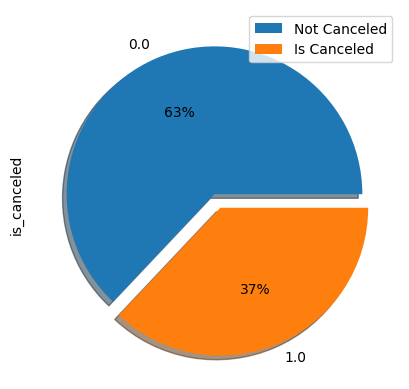

In [74]:
cancelled_data.plot(kind='pie',autopct='%0.0f%%',explode=(0.0,0.1),shadow='True')
labels = "Not Canceled","Is Canceled"
plt.legend(labels=labels)

Text(0, 0.5, 'Number of reservation')

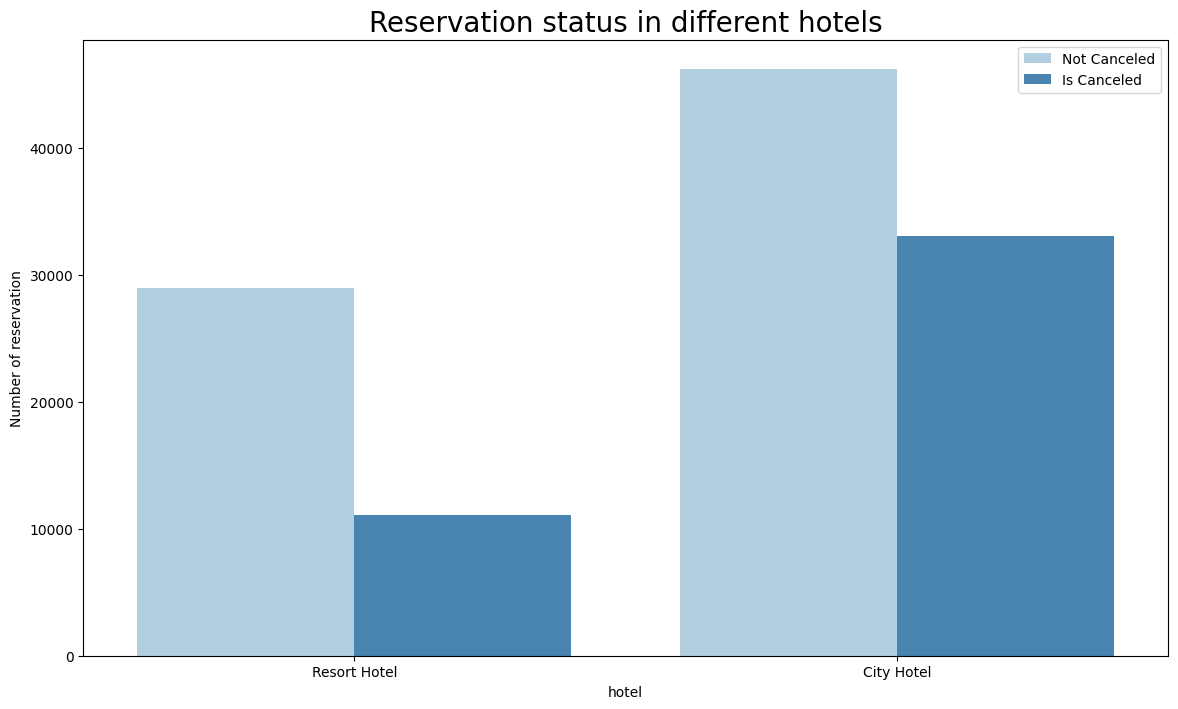

In [75]:
plt.figure(figsize=(14,8))
ax1 = sns.countplot(data = df_new, x = 'hotel', hue = 'is_canceled', palette = 'Blues')
# labels = ax1.get_legend_handles_labels()
labels = "Not Canceled","Is Canceled"
plt.legend(labels=labels)
plt.title('Reservation status in different hotels', size=20)
plt.xlabel('hotel')
plt.ylabel('Number of reservation')

In [76]:
hotel = df_new[df_new['hotel']=='Resort Hotel']
hotel = hotel['is_canceled'].value_counts(normalize=True)

In [77]:
hotel

0.0    0.722366
1.0    0.277634
Name: is_canceled, dtype: float64

In [78]:
hotel_city = df_new[df_new['hotel']=='City Hotel']
hotel_city = hotel_city['is_canceled'].value_counts(normalize=True)

In [79]:
hotel_city

0.0    0.58273
1.0    0.41727
Name: is_canceled, dtype: float64

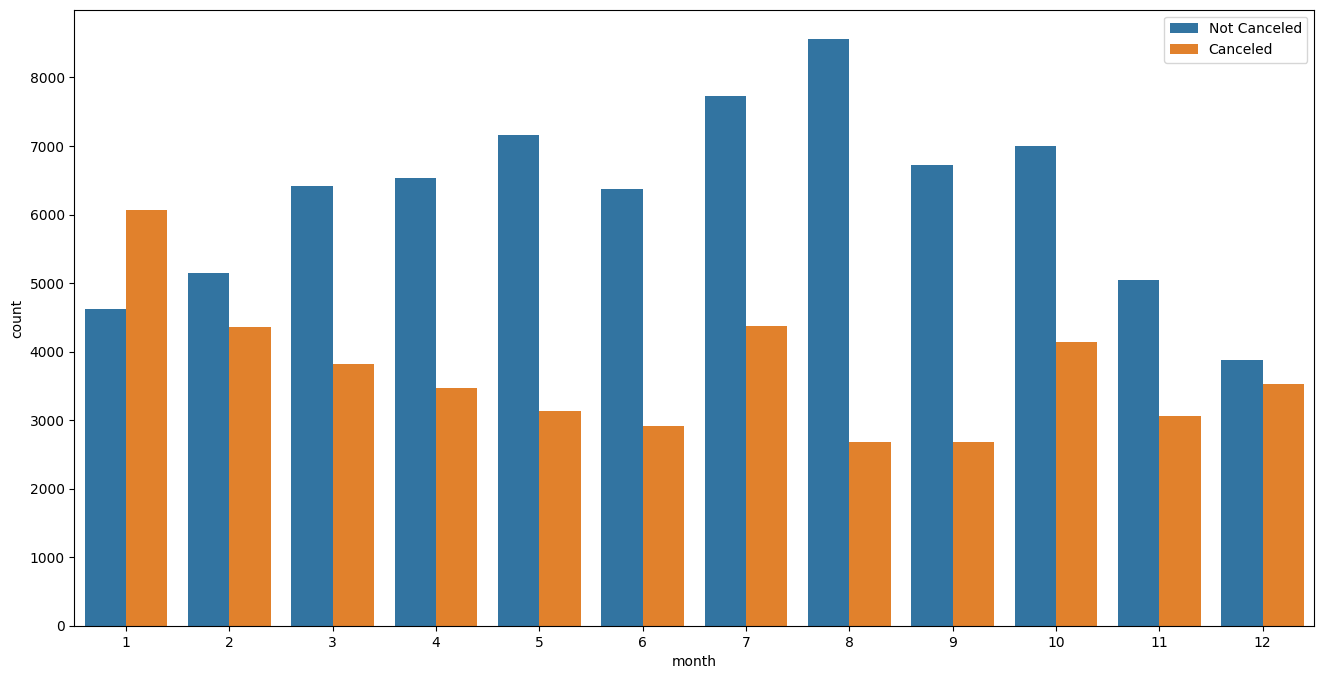

In [80]:
df_new['month'] = df_new['reservation_status_date'].dt.month
plt.figure(figsize =(16,8))
ax1 = sns.countplot(data = df_new, x = 'month', hue = 'is_canceled')
plt.legend(['Not Canceled', 'Canceled'])
plt.show()

In [81]:
df_new[df_new['hotel']=='City Hotel'].corr()['is_canceled']

is_canceled                       1.000000
lead_time                         0.309242
arrival_date_year                -0.003004
arrival_date_week_number          0.001580
arrival_date_day_of_month        -0.004331
stays_in_weekend_nights          -0.007343
stays_in_week_nights              0.048704
adults                            0.053054
babies                           -0.030186
is_repeated_guest                -0.065840
previous_cancellations            0.166643
previous_bookings_not_canceled   -0.053134
booking_changes                  -0.149500
agent                            -0.015490
company                           0.068673
days_in_waiting_list              0.060965
adr                              -0.011965
required_car_parking_spaces      -0.133096
total_of_special_requests        -0.293889
children                         -0.027089
month                            -0.063227
Name: is_canceled, dtype: float64

In [82]:
City_Hotel = date_city.groupby(['arrival_date_month'])['lead_time'].mean().reset_index()
City_Hotel

,arrival_date_month,lead_time
0,April,75.911582
1,August,101.129902
2,December,51.301421
3,February,36.338120
4,January,32.423248
5,July,132.716646
6,June,103.439075
7,March,53.425589
8,May,90.046080
9,November,53.683976


In [83]:
City_Hotel_Cancel = date_city_c.groupby(['arrival_date_month'])['lead_time'].mean().reset_index()
City_Hotel_Cancel

,arrival_date_month,lead_time
0,April,126.011255
1,August,174.998057
2,December,130.772989
3,February,79.372962
4,January,93.400810
5,July,183.781609
6,June,150.221088
7,March,106.846605
8,May,148.926088
9,November,159.496689


In [84]:
City_Hotel_Final = pd.merge(City_Hotel,City_Hotel_Cancel, on = 'arrival_date_month')
City_Hotel_Final.columns = ['months','lead_time','lead_time_c']
City_Hotel_Final

,months,lead_time,lead_time_c
0,April,75.911582,126.011255
1,August,101.129902,174.998057
2,December,51.301421,130.772989
3,February,36.338120,79.372962
4,January,32.423248,93.400810
5,July,132.716646,183.781609
6,June,103.439075,150.221088
7,March,53.425589,106.846605
8,May,90.046080,148.926088
9,November,53.683976,159.496689


In [85]:
City_Hotel_Final = sort_month(City_Hotel_Final,'months')
City_Hotel_Final

,months,lead_time,lead_time_c
0,January,32.423248,93.400810
1,February,36.338120,79.372962
2,March,53.425589,106.846605
3,April,75.911582,126.011255
4,May,90.046080,148.926088
5,June,103.439075,150.221088
6,July,132.716646,183.781609
7,August,101.129902,174.998057
8,September,81.839161,191.282637
9,October,83.621858,181.899021


In [86]:
px.line(City_Hotel_Final,x='months',y=['lead_time','lead_time_c'],title = 'Relation Between Mongths & City Hotel Booking',template='plotly_dark')

In [87]:
city = df_new[df_new['hotel']=='City Hotel']
city

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,babies,is_repeated_guest,...,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,country,month
40060,0.0,6.0,2015.0,27.0,1.0,0.0,2.0,1.0,0.0,0.0,...,Offline TA/TO,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-07-03,PRT,7
40061,1.0,88.0,2015.0,27.0,1.0,0.0,4.0,2.0,0.0,0.0,...,Online TA,TA/TO,A,A,No Deposit,Transient,Canceled,2015-07-01,PRT,7
40062,1.0,65.0,2015.0,27.0,1.0,0.0,4.0,1.0,0.0,0.0,...,Online TA,TA/TO,A,A,No Deposit,Transient,Canceled,2015-04-30,PRT,4
40063,1.0,92.0,2015.0,27.0,1.0,2.0,4.0,2.0,0.0,0.0,...,Online TA,TA/TO,A,A,No Deposit,Transient,Canceled,2015-06-23,PRT,6
40064,1.0,100.0,2015.0,27.0,2.0,0.0,2.0,2.0,0.0,0.0,...,Online TA,TA/TO,A,A,No Deposit,Transient,Canceled,2015-04-02,PRT,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0.0,23.0,2017.0,35.0,30.0,2.0,5.0,2.0,0.0,0.0,...,Offline TA/TO,TA/TO,A,A,No Deposit,Transient,Check-Out,2017-09-06,BEL,9
119386,0.0,102.0,2017.0,35.0,31.0,2.0,5.0,3.0,0.0,0.0,...,Online TA,TA/TO,E,E,No Deposit,Transient,Check-Out,2017-09-07,FRA,9
119387,0.0,34.0,2017.0,35.0,31.0,2.0,5.0,2.0,0.0,0.0,...,Online TA,TA/TO,D,D,No Deposit,Transient,Check-Out,2017-09-07,DEU,9
119388,0.0,109.0,2017.0,35.0,31.0,2.0,5.0,2.0,0.0,0.0,...,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2017-09-07,GBR,9


<Axes: xlabel='total_of_special_requests', ylabel='count'>

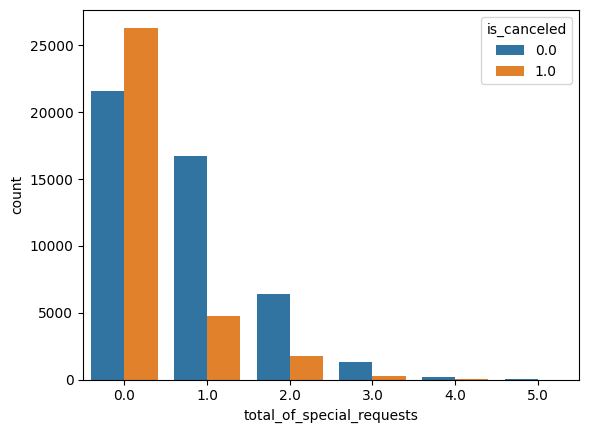

In [88]:
sns.countplot(city,x='total_of_special_requests',hue='is_canceled')

<Axes: xlabel='required_car_parking_spaces', ylabel='count'>

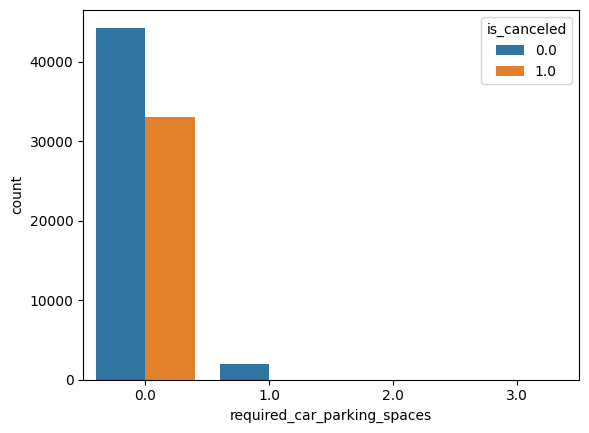

In [89]:
sns.countplot(city,x='required_car_parking_spaces',hue='is_canceled')

In [90]:
carpark_1 =  city[city['required_car_parking_spaces']==0]
carpark_1 = carpark_1['is_canceled'].value_counts(normalize = 'True')

carpark_2 =  city[city['required_car_parking_spaces'] > 0]
carpark_2 = carpark_2['is_canceled'].value_counts(normalize = 'True')

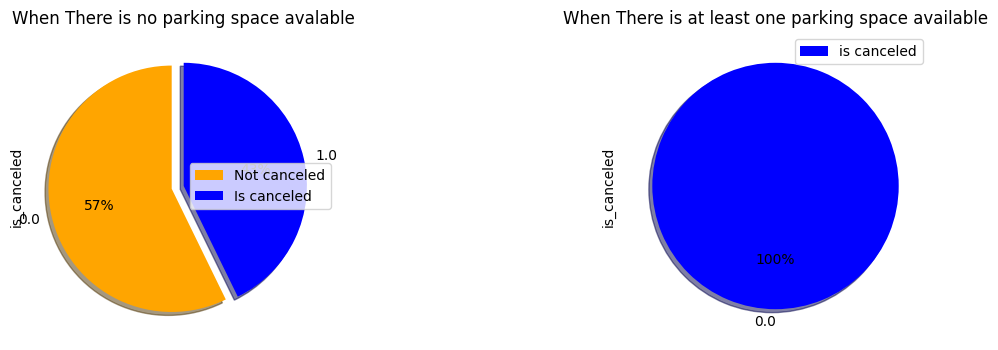

In [91]:
plt.figure(figsize=(14,4))
plt.subplot(121)
carpark_1.plot(kind='pie',autopct='%0.0f%%',explode=(0.1,0.0),shadow='True',colors=['orange','blue'],startangle=90)
plt.title("When There is no parking space avalable")
plt.legend(['Not canceled','Is canceled'])

plt.subplot(122)
carpark_2.plot(kind='pie',autopct='%0.0f%%',shadow='True',colors=['blue','orange'],startangle=90)
plt.title("When There is at least one parking space available")
plt.legend(['is canceled','not canceled'])
plt.show()

<Axes: xlabel='previous_cancellations', ylabel='count'>

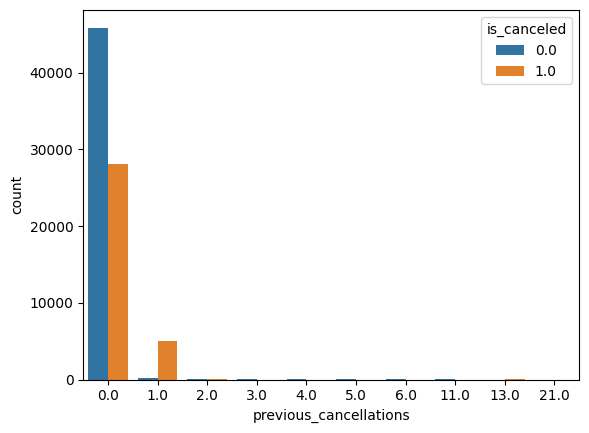

In [92]:
sns.countplot(city,x='previous_cancellations',hue='is_canceled')

In [93]:
previous_cancellations_1 = city[city['previous_cancellations']==0]
previous_cancellations_1 = previous_cancellations_1['is_canceled'].value_counts(normalize='True')

previous_cancellations_2 = city[city['previous_cancellations'] > 0]
previous_cancellations_2 = previous_cancellations_2['is_canceled'].value_counts(normalize='True')

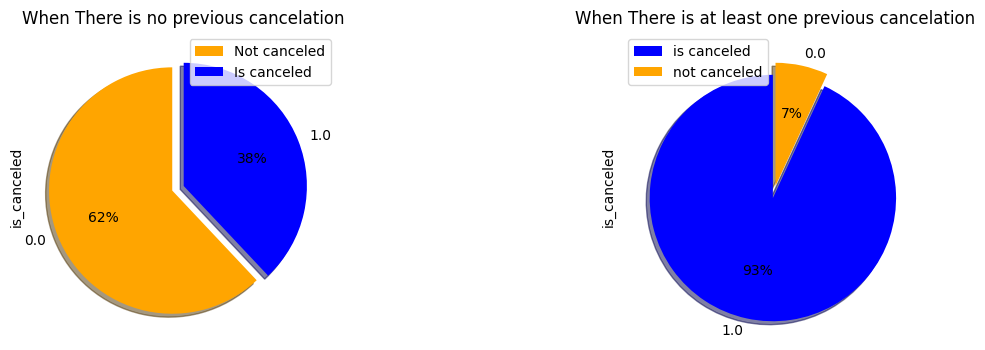

In [94]:
plt.figure(figsize=(14,4))
plt.subplot(121)
previous_cancellations_1.plot(kind='pie',autopct='%0.0f%%',explode=(0.1,0.0),shadow='True',colors=['orange','blue'],startangle=90)
plt.title("When There is no previous cancelation")
plt.legend(['Not canceled','Is canceled'])

plt.subplot(122)
previous_cancellations_2.plot(kind='pie',autopct='%0.0f%%',explode=(0.1,0.0),shadow='True',colors=['blue','orange'],startangle=90)
plt.title("When There is at least one previous cancelation")
plt.legend(['is canceled','not canceled'])
plt.show()

In [95]:
Resort = df_new[df_new['hotel']=='Resort Hotel']
Resort.corr()['is_canceled']

is_canceled                       1.000000
lead_time                         0.229444
arrival_date_year                 0.043624
arrival_date_week_number          0.021601
arrival_date_day_of_month        -0.009386
stays_in_weekend_nights           0.078569
stays_in_week_nights              0.078477
adults                            0.080546
babies                           -0.023254
is_repeated_guest                -0.103563
previous_cancellations            0.114173
previous_bookings_not_canceled   -0.076767
booking_changes                  -0.114835
agent                             0.038819
company                          -0.049327
days_in_waiting_list             -0.036301
adr                               0.109317
required_car_parking_spaces      -0.243863
total_of_special_requests        -0.101295
children                          0.081234
month                            -0.085270
Name: is_canceled, dtype: float64

In [96]:
Resort_Hotel = data_resort.groupby(['arrival_date_month'])['lead_time'].mean().reset_index()
Resort_Hotel

,arrival_date_month,lead_time
0,April,73.631765
1,August,92.794596
2,December,44.870600
3,February,27.603120
4,January,19.671842
5,July,96.211986
6,June,125.739450
7,March,52.411970
8,May,107.077318
9,November,32.330466


In [97]:
Resort_Hotel_c = data_resort_c.groupby(['arrival_date_month'])['lead_time'].mean().reset_index()
Resort_Hotel_c

,arrival_date_month,lead_time
0,April,115.501416
1,August,124.784973
2,December,91.892235
3,February,75.716981
4,January,62.750769
5,July,126.692201
6,June,163.897716
7,March,104.072084
8,May,155.641602
9,November,101.407809


In [98]:
Final_Resort = pd.merge(Resort_Hotel,Resort_Hotel_c, on = 'arrival_date_month')
Final_Resort.columns = ['months', 'lead_time', 'lead_time_c']

In [99]:
Final_Resort = sort_month(Final_Resort,'months')
Final_Resort

,months,lead_time,lead_time_c
0,January,19.671842,62.750769
1,February,27.603120,75.716981
2,March,52.411970,104.072084
3,April,73.631765,115.501416
4,May,107.077318,155.641602
5,June,125.739450,163.897716
6,July,96.211986,126.692201
7,August,92.794596,124.784973
8,September,146.132255,181.942346
9,October,102.842452,153.866053


In [100]:
px.line(Final_Resort,x='months',y=['lead_time','lead_time_c'],title = 'Resort Hotel Cancelation & lead_time',template = "plotly_dark")

<Axes: xlabel='total_of_special_requests', ylabel='count'>

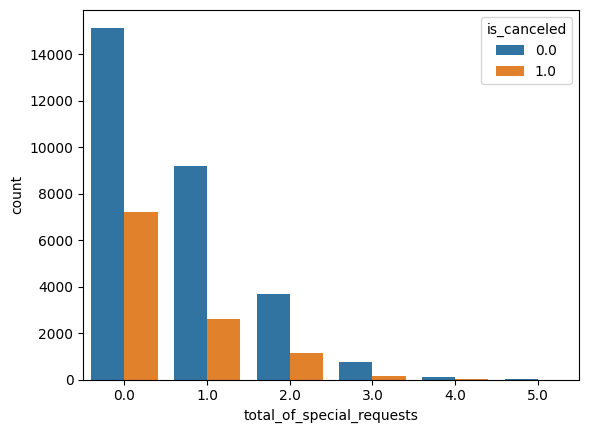

In [101]:
sns.countplot(Resort,x='total_of_special_requests',hue='is_canceled')

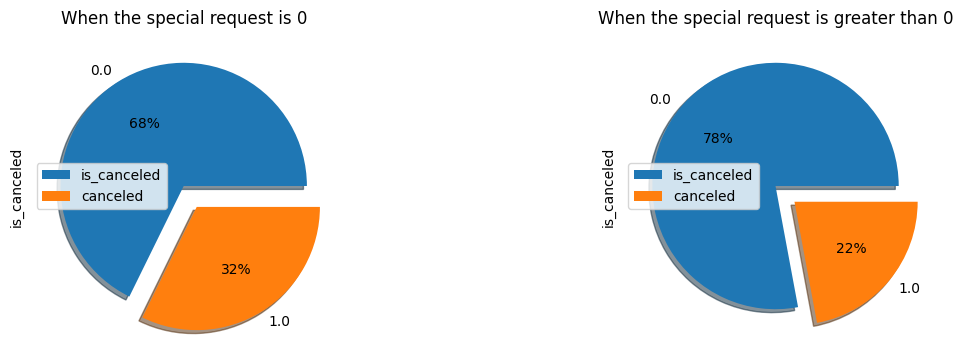

In [102]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.title('When the special request is 0')
Total_of_special_0 = Resort[Resort['total_of_special_requests']==0]
Total_of_special_0 = Total_of_special_0['is_canceled'].value_counts(normalize=True)
Total_of_special_0.plot(kind='pie',autopct='%0.0f%%',explode=(0.0,0.2),shadow=True)
plt.legend(['is_canceled','canceled'])

plt.subplot(122)
plt.title('When the special request is greater than 0')
Total_of_special_1 = Resort[Resort['total_of_special_requests']>0]
Total_of_special_1 = Total_of_special_1['is_canceled'].value_counts(normalize=True)
Total_of_special_1.plot(kind='pie',autopct='%0.0f%%',explode=(0.0,0.2),shadow=True)
plt.legend(['is_canceled','canceled'])

<Axes: xlabel='required_car_parking_spaces', ylabel='count'>

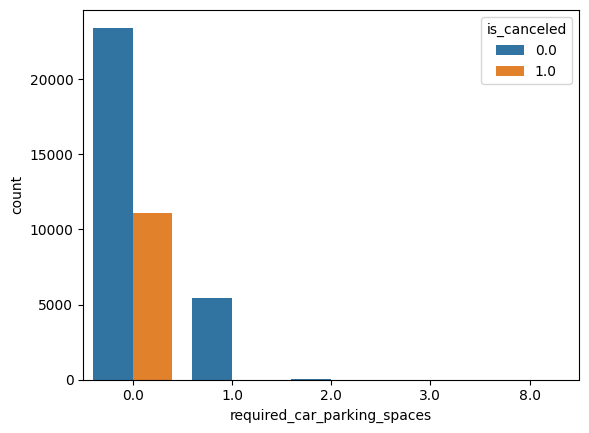

In [103]:
sns.countplot(Resort,x='required_car_parking_spaces',hue='is_canceled')

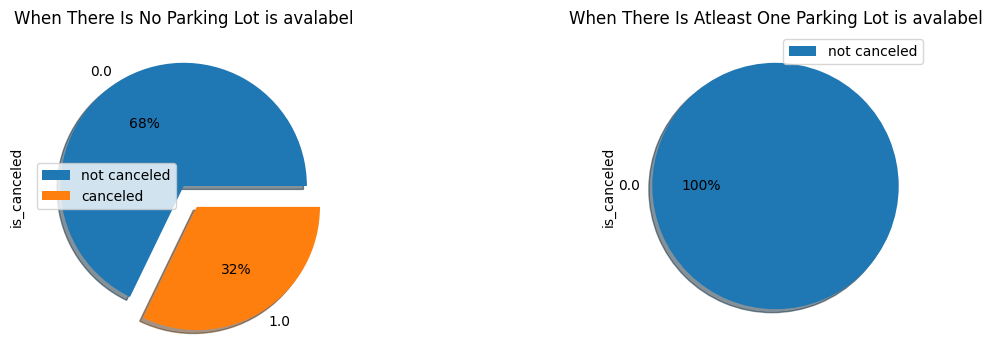

In [104]:
plt.figure(figsize=(14,4))
plt.subplot(121)

plt.title("When There Is No Parking Lot is avalabel")
Parking_0 = Resort[Resort['required_car_parking_spaces']==0]
Parking_0 = Parking_0['is_canceled'].value_counts(normalize=True)
Parking_0.plot(kind='pie', autopct='%0.0f%%', explode=(0.0,0.2), shadow=True)
plt.legend(['not canceled','canceled'])

plt.subplot(122)
plt.title("When There Is Atleast One Parking Lot is avalabel")
Parking_1 = Resort[Resort['required_car_parking_spaces'] > 0]
Parking_1 = Parking_1['is_canceled'].value_counts(normalize=True)
Parking_1.plot(kind='pie', autopct='%0.0f%%', shadow=True)
plt.legend(['not canceled'])

In [105]:
previous_cancellations_1 = Resort[Resort['previous_cancellations']==0]
previous_cancellations_1 = previous_cancellations_1['is_canceled'].value_counts(normalize='True')

previous_cancellations_2 = Resort[Resort['previous_cancellations'] > 0]
previous_cancellations_2 = previous_cancellations_2['is_canceled'].value_counts(normalize='True')

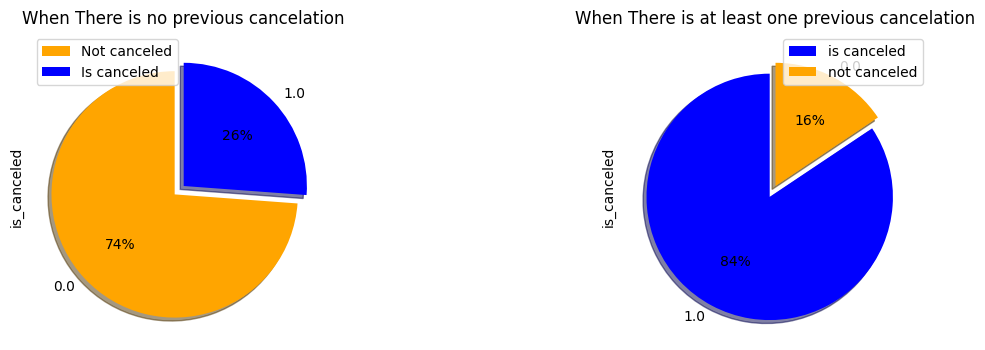

In [106]:
plt.figure(figsize=(14,4))
plt.subplot(121)
previous_cancellations_1.plot(kind='pie',autopct='%0.0f%%',explode=(0.1,0.0),shadow='True',colors=['orange','blue'],startangle=90)
plt.title("When There is no previous cancelation")
plt.legend(['Not canceled','Is canceled'])

plt.subplot(122)
previous_cancellations_2.plot(kind='pie',autopct='%0.0f%%',explode=(0.1,0.0),shadow='True',colors=['blue','orange'],startangle=90)
plt.title("When There is at least one previous cancelation")
plt.legend(['is canceled','not canceled'])
plt.show()

<Axes: xlabel='is_repeated_guest', ylabel='count'>

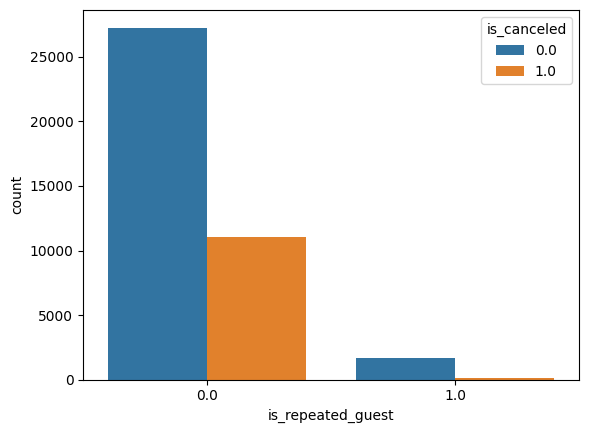

In [107]:
sns.countplot(Resort,x='is_repeated_guest',hue='is_canceled')

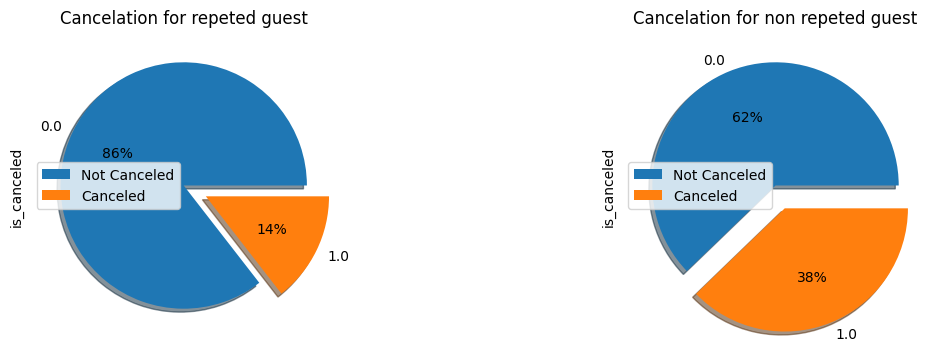

In [108]:
plt.figure(figsize=(14,4))
plt.subplot(121)

plt.title("Cancelation for repeted guest")
Repeted_guest = df_new[df_new['is_repeated_guest']==1]
Repeted_guest=Repeted_guest['is_canceled'].value_counts(normalize=True)
Repeted_guest.plot(kind='pie',autopct='%0.0f%%', explode=(0.0,0.2),shadow=True)
plt.legend(['Not Canceled','Canceled'])

plt.subplot(122)

plt.title("Cancelation for non repeted guest")
Not_Repeted_guest = df_new[df_new['is_repeated_guest']==0]
Not_Repeted_guest=Not_Repeted_guest['is_canceled'].value_counts(normalize=True)
Not_Repeted_guest.plot(kind='pie',autopct='%0.0f%%', explode=(0.0,0.2),shadow=True)
plt.legend(['Not Canceled', 'Canceled'])

plt.show()